In [2]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [3]:
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
from information.covid_info import covid_events

In [6]:
df = pd.read_csv('../netstats/processed/netstats-threshold-0.5.csv')
df.tail()

,date,density,global_cc
331,2021-03-12,0.080952,0.074286
332,2021-03-13,0.080952,0.074286
333,2021-03-14,0.080952,0.074286
334,2021-03-15,0.109524,0.092698
335,2021-03-16,0.119048,0.097143


In [7]:
_metrics =  ['density', 'global_cc']

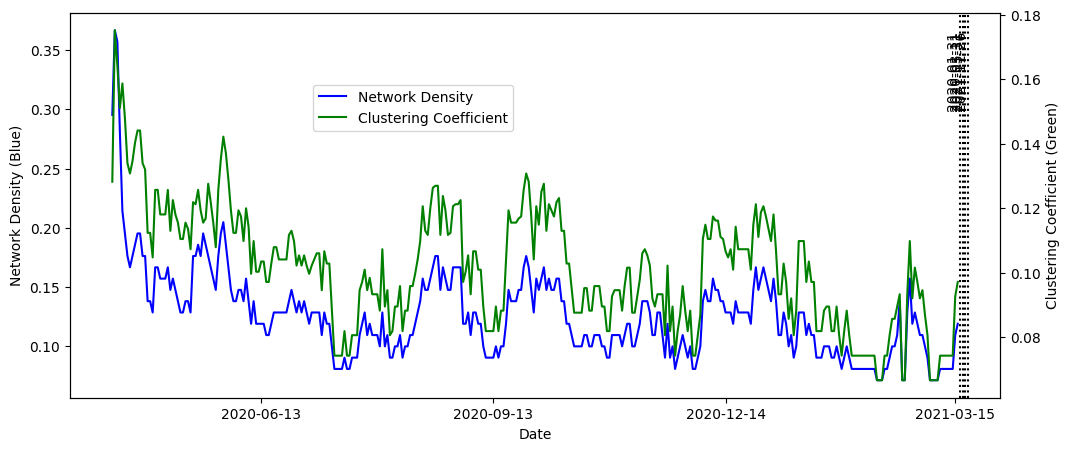

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

left_axis = ax
right_axis = left_axis.twinx()

sns.lineplot(
    data=df, x='date', y='density', 
    color="b", 
    ax=left_axis,
    label="Network Density"
)
sns.lineplot(
    data=df, x='date', y='global_cc',
    color="g", 
    ax=right_axis,
    label="Clustering Coefficient",
    # alpha=0
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# ax.xaxis.set_minor_locator(mdates.MonthLocator())

# ax.minorticks_on()

for event_date in covid_events.keys():
    x_pos = date.fromisoformat(event_date)
    y_pos = max(df['density'].to_numpy()) # Label on left axis

    ax.axvline(event_date, color="black", linestyle=":")
    text = ax.annotate(
        text = event_date, 
        xy = (event_date, y_pos),
        rotation = 90, va='top', ha='right')

left_axis.set_xlabel('Date')
left_axis.set_ylabel('Network Density (Blue)')
right_axis.set_ylabel('Clustering Coefficient (Green)')

left_axis.get_legend().remove()
right_axis.get_legend().remove()

fig.legend(loc='upper right', bbox_to_anchor=[0.5, 0.75])

plt.savefig("../../graphs/Figure06_NetworkStats-Density_vs_TransitivityWithEvents.pdf", bbox_inches='tight')
plt.savefig("../../graphs/Figure06_NetworkStats-Density_vs_TransitivityWithEvents.png", bbox_inches='tight')
plt.show()